# Book5_2

# 실습 15. Word2Vec

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!ls -l /content/drive/MyDrive/googlenews/GoogleNews-vectors-negative300.bin.gz

-rw------- 1 root root 1647046227 Mar 12 12:54 /content/drive/MyDrive/googlenews/GoogleNews-vectors-negative300.bin.gz


In [ ]:
# 런타임 1분 20초
import gensim

# Google Drive에 접속하여 다운로드한 Google News의 bin.gz 파일 지정
# 사전 학습된 모델의 벡터 불러오기
model = gensim.models.KeyedVectors.load_word2vec_format(
    '/content/drive/MyDrive/googlenews/GoogleNews-vectors-negative300.bin.gz', binary=True)

In [ ]:
# 단어 벡터의 계산 king_vec = model['king']
king_vec = model['king']
man_vec = model['man']
woman_vec = model['woman']
queen_vec = king_vec - man_vec + woman_vec

# 유사 단어 확인
similar_words = model.most_similar(positive=[queen_vec], topn=10)
for word, similarity in similar_words:
  print(f'{word}: {similarity}')

king: 0.8449392318725586
queen: 0.7300517559051514
monarch: 0.645466148853302
princess: 0.6156251430511475
crown_prince: 0.5818676352500916
prince: 0.5777117609977722
kings: 0.5613663792610168
sultan: 0.5376775860786438
Queen_Consort: 0.5344247817993164
queens: 0.5289887189865112


In [ ]:
# 유사 단어 확인
similar_words = model.most_similar(positive=[king_vec, woman_vec],negative=[man_vec],topn=10)
for word, similarity in similar_words:
  print(f'{word}: {similarity}')


king: 0.8449392318725586
queen: 0.7300516366958618
monarch: 0.645466148853302
princess: 0.6156251430511475
crown_prince: 0.5818676352500916
prince: 0.5777117609977722
kings: 0.5613663792610168
sultan: 0.5376775860786438
Queen_Consort: 0.5344247817993164
queens: 0.5289887189865112


In [ ]:
from itertools import combinations

# 주어진 과일 목록
fruits = ["pen", "pineapple", "banana"]

# 2가지 과일 조합 생성
combinations_of_fruits = combinations(fruits, 2)

# 조합내 단어 유사도 출력
for combination in combinations_of_fruits:
  cos_similarity = model.similarity(combination[0], combination[1])
  print(combination[0], combination[1],cos_similarity)

pen pineapple 0.06774566
pen banana 0.05356275
pineapple banana 0.6587538


# 실습 16. SENTENCE 트랜스포머

In [ ]:
!pip install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.5/156.5 kB 4.5 MB/s eta 0:00:00


In [ ]:
import torch
from sentence_transformers import SentenceTransformer

# 모델
model_st = SentenceTransformer("sentence-transformers/bert-base-nli-mean-tokens")

sentences = ["I went river fishing and stood on the bank for a while.",
             "I went to bank for withdrawing money.",
             "I played fishing near the ocean."]

# 임베딩
embeddings = model_st.encode(sentences)

# 코사인 유사도
s1 = torch.tensor(embeddings[0])
s2 = torch.tensor(embeddings[1])
s3 = torch.tensor(embeddings[2])

cos_similarity = torch.cosine_similarity(s1, s2, dim=0)
print(f"s1-s2:{cos_similarity.item()}")

cos_similarity = torch.cosine_similarity(s1, s3, dim=0)
print(f"s1-s3:{cos_similarity.item()}")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.99k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


tokenizer_config.json:   0%|          | 0.00/399 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

s1-s2:0.3672091066837311
s1-s3:0.7351642847061157


# 실습 17.Text to Image 작업

In [ ]:
### 여기서부터 런타임 유형변경에서 GPT 설정 필요(예 T4-GPU)
!pip install diffusers==0.12.1 transformers==4.19.2 ftfy accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 604.0/604.0 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.1/290.1 kB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 57.6 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.15.2
    Uninstalling tokenizers-0.15.2:
      Successfully uninstalled tokenizers-0.15.2
  Attempting uninstall: transformers
    Found existing installation: transformers 4.38.2
    Uninstalling transformers-4.38.2:
      Successfully uninstalled transformers-4.38.2


In [ ]:
# 런타임 1분 소요
import torch
from diffusers import StableDiffusionPipeline

model_id = "CompVis/stable-diffusion-v1-4"
device = "cuda"

# 프롬프트
prompt = "Mt. Fuji in the style of Gauguin"

# 파이프라인 생성
pipe = StableDiffusionPipeline.from_pretrained(model_id, revision="fp16", torch_dtype=torch.float16)
pipe = pipe.to(device)

# 파이프라인 실행
generator = torch.Generator(device).manual_seed(42) # seed를 이전과 동일하게 42로 설정
with torch.autocast("cuda"):
  image = pipe(prompt, guidance_scale=7.5, generator=generator).images[0]

# 생성된 이미지 저장
image.save("mt_fuji_gauguin.png")

model_index.json:   0%|          | 0.00/543 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

(…)kpoints/scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/307 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.63k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/572 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/788 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/550 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/246M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/608M [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/167M [00:00<?, ?B/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Mounted at /content/drive


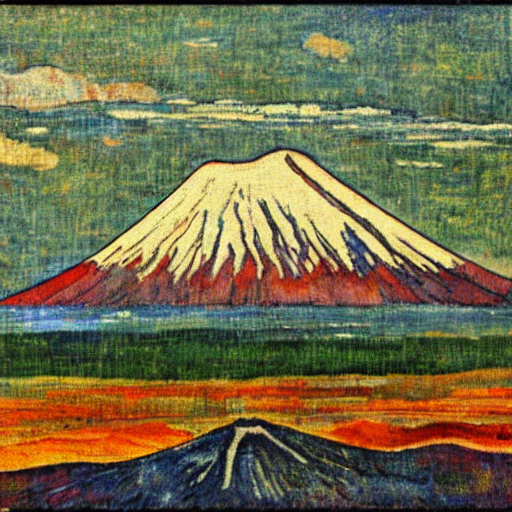

In [ ]:
from google.colab import drive

# Image와 display 불러오기
from IPython.display import Image, display

# 구글 드라이브 연동
drive.mount('/content/drive')

# 이미지 파일의 경로를 지정합니다.(예시 경로입니다. 실제로는 독자 여러분의 경로로 변경해야 합니다.)
image_path = '/content/mt_fuji_gauguin.png'

# 이미지를 디스플레이합니다.
display(Image(filename=image_path))


# 추가 문제 코드

In [ ]:
import torch
from diffusers import StableDiffusionPipeline

# 프롬프트
prompt = """
8k, RAW photo, best quality, masterpiece, realistic, photo-realistic, clear,
professional lighting, beautiful face, best quality, ultra high res BREAK
(full body 1.5),
BREAK
realistic disney princess Arial sytle, long hair, smile
BREAK
mermaid,
BREAK
beach """
negative_prompt="""
bad anatomy,long_body,mutated hands,missing arms,extra_arms,extra_legs,bad hands,missing_limb,disconnected_limbs,extra_fingers,missing fingers,liquid fingers,ugly face,deformed eyes,cropped
"""

model_id = "CompVis/stable-diffusion-v1-4"
device = "cuda"

# 파이프라인 생성
pipe = StableDiffusionPipeline.from_pretrained(model_id, revision="fp16",
                                               torch_dtype=torch.float16)
pipe = pipe.to(device)

# 파이프라인 실행
generator = torch.Generator(device).manual_seed(42) # seed는 전과 동일하게 42로 설정

with torch.autocast("cuda"):
  image = pipe(prompt, negative_prompt=negative_prompt, guidance_scale=7.5, generator=generator).images[0]

# 생성된 이미지 저장
image.save("mermaid.png")

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

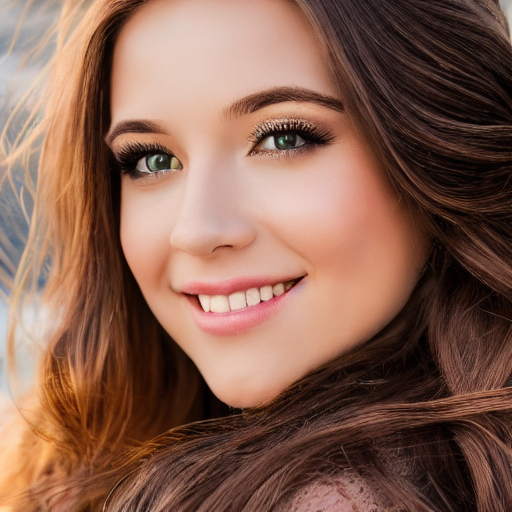

In [ ]:
# Image와 display 불러오기
from IPython.display import Image, display

# 이미지 파일의 경로를 지정(예시 경로입니다. 실제로는 독자 여러분의 경로로 변경해야 합니다.)
image_path = '/content/mermaid.png'

# 이미지를 디스플레이합니다.
display(Image(filename=image_path))